In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 正方行列と X および Y のラベルの行列を渡す
#from https://qiita.com/ynakayama/items/7dc01f45caf6d87a981b
def draw_heatmap(data, row_labels, column_labels):
    # 描画する
    fig, ax = plt.subplots(figsize=(30,30))
    heatmap = ax.pcolor(data, cmap=plt.cm.Blues)

    ax.set_xticks(np.arange(data.shape[0]) + 0.5, minor=False)
    ax.set_yticks(np.arange(data.shape[1]) + 0.5, minor=False)

    ax.invert_yaxis()
    ax.xaxis.tick_top()
    
    ax.set_xticklabels(row_labels, minor=False, rotation=90)
    ax.set_yticklabels(column_labels, minor=False)
    plt.show()
    #plt.savefig('image.png')

    return heatmap

In [3]:
def draw_bar(data, columns, rows):
    fig, ax = plt.subplots(figsize=(30,5))
    color_list = ['#E60012', '#F39800', '#FFF100', '#8FC31F', '#009944', '#009E96', '#00A0E9', '#0068B7', '#1D2088', '#920783', '#E4007F', '#E5004F', '#EA5532', '#F6AD3C', '#FFF33F', '#AACF52', '#00A95F', '#00ADA9', '#00AFEC', '#187FC4', '#4D4398', '#A64A97', '#E85298', '#E9546B', '#D7000F', '#E48E00', '#F3E100', '#86B81B', '#009140', '#00958D', '#0097DB', '#0062AC', '#1B1C80', '#8A017C', '#D60077', '#D7004A', '#C7000B', '#D28300', '#DFD000', '#7BAA17', '#00873C', '#008A83', '#008DCB', '#005AA0', '#181878', '#800073', '#C6006F', '#C70044', '#EF845C', '#F9C270', '#FFF67F', '#C1DB81', '#69BD83', '#61C1BE', '#54C3F1', '#6C9BD2', '#796BAF', '#BA79B1', '#EE87B4', '#EF858C', '#DE6641', '#E8AC51', '#F2E55C', '#AAC863', '#39A869', '#27ACA9', '#00AEE0', '#4784BF', '#5D5099', '#A55B9A', '#DC669B', '#DD6673']
    left = np.arange(len(columns))  # numpyで横軸を設定
    labels = columns 
    width = 1/len(rows) 
    for i in range(len(rows)):
        plt.bar(left+width*i, data[i], color=color_list[i], width=width, align='center', label = rows[i])
    plt.xticks(left + width/2, labels, rotation=90)
    plt.legend()
    plt.show()

In [4]:
def draw_stackedbar(data, columns, rows):
    fig, ax = plt.subplots(figsize=(30,5))
    color_list = ['#E60012', '#F39800', '#FFF100', '#8FC31F', '#009944', '#009E96', '#00A0E9', '#0068B7', '#1D2088', '#920783', '#E4007F', '#E5004F', '#EA5532', '#F6AD3C', '#FFF33F', '#AACF52', '#00A95F', '#00ADA9', '#00AFEC', '#187FC4', '#4D4398', '#A64A97', '#E85298', '#E9546B', '#D7000F', '#E48E00', '#F3E100', '#86B81B', '#009140', '#00958D', '#0097DB', '#0062AC', '#1B1C80', '#8A017C', '#D60077', '#D7004A', '#C7000B', '#D28300', '#DFD000', '#7BAA17', '#00873C', '#008A83', '#008DCB', '#005AA0', '#181878', '#800073', '#C6006F', '#C70044', '#EF845C', '#F9C270', '#FFF67F', '#C1DB81', '#69BD83', '#61C1BE', '#54C3F1', '#6C9BD2', '#796BAF', '#BA79B1', '#EE87B4', '#EF858C', '#DE6641', '#E8AC51', '#F2E55C', '#AAC863', '#39A869', '#27ACA9', '#00AEE0', '#4784BF', '#5D5099', '#A55B9A', '#DC669B', '#DD6673']
    left = np.arange(len(columns))  # numpyで横軸を設定
    labels = columns 
    for i in range(len(rows)):
        if i == 0:
            plt.bar(left, data[i], color=color_list[i], align='center', label = rows[i])
        else:
            plt.bar(left, data[i], color=color_list[i], align='center', label = rows[i], bottom=[sum(col) for col in zip(*[data[j] for j in range(i)])])
    plt.xticks(left, labels, rotation=90)
    plt.legend()
    plt.show()

## 基本分析
2023/04/18

In [5]:
wbakeries = pd.read_csv('Bakery_withWeather.csv', index_col=0)
wbakeries

,TransactionNo,Items,DateTime,Daypart,DayType,dt_time,dt,dt_iso,timezone,city_name,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend,2016-10-30 09:00:00,1.477814e+09,2016-10-30 08:00:00 +0000 UTC,0.0,Edinburgh,...,NaN,NaN,NaN,NaN,NaN,75.0,803.0,Clouds,broken clouds,04d
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,2016-10-30 10:00:00,1.477818e+09,2016-10-30 09:00:00 +0000 UTC,0.0,Edinburgh,...,NaN,NaN,NaN,NaN,NaN,40.0,802.0,Clouds,scattered clouds,03d
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,2016-10-30 10:00:00,1.477818e+09,2016-10-30 09:00:00 +0000 UTC,0.0,Edinburgh,...,NaN,NaN,NaN,NaN,NaN,40.0,802.0,Clouds,scattered clouds,03d
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend,2016-10-30 10:00:00,1.477818e+09,2016-10-30 09:00:00 +0000 UTC,0.0,Edinburgh,...,NaN,NaN,NaN,NaN,NaN,40.0,802.0,Clouds,scattered clouds,03d
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend,2016-10-30 10:00:00,1.477818e+09,2016-10-30 09:00:00 +0000 UTC,0.0,Edinburgh,...,NaN,NaN,NaN,NaN,NaN,40.0,802.0,Clouds,scattered clouds,03d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21089,9682,Coffee,2017-09-04 14:32:58,Afternoon,Weekend,2017-09-04 14:00:00,1.504530e+09,2017-09-04 13:00:00 +0000 UTC,3600.0,Edinburgh,...,NaN,0.11,NaN,NaN,NaN,75.0,500.0,Rain,light rain,10d
21090,9682,Tea,2017-09-04 14:32:58,Afternoon,Weekend,2017-09-04 14:00:00,1.504530e+09,2017-09-04 13:00:00 +0000 UTC,3600.0,Edinburgh,...,NaN,0.11,NaN,NaN,NaN,75.0,500.0,Rain,light rain,10d
21091,9683,Coffee,2017-09-04 14:57:06,Afternoon,Weekend,2017-09-04 14:00:00,1.504530e+09,2017-09-04 13:00:00 +0000 UTC,3600.0,Edinburgh,...,NaN,0.11,NaN,NaN,NaN,75.0,500.0,Rain,light rain,10d
21092,9683,Pastry,2017-09-04 14:57:06,Afternoon,Weekend,2017-09-04 14:00:00,1.504530e+09,2017-09-04 13:00:00 +0000 UTC,3600.0,Edinburgh,...,NaN,0.11,NaN,NaN,NaN,75.0,500.0,Rain,light rain,10d


In [6]:
wbakeries.columns

Index(['TransactionNo', 'Items', 'DateTime', 'Daypart', 'DayType', 'dt_time',
       'dt', 'dt_iso', 'timezone', 'city_name', 'lat', 'lon', 'temp',
       'visibility', 'dew_point', 'feels_like', 'temp_min', 'temp_max',
       'pressure', 'sea_level', 'grnd_level', 'humidity', 'wind_speed',
       'wind_deg', 'wind_gust', 'rain_1h', 'rain_3h', 'snow_1h', 'snow_3h',
       'clouds_all', 'weather_id', 'weather_main', 'weather_description',
       'weather_icon'],
      dtype='object')

### (1) 同じTransaction IDで売れているもの(一緒に買われる商品、相関)

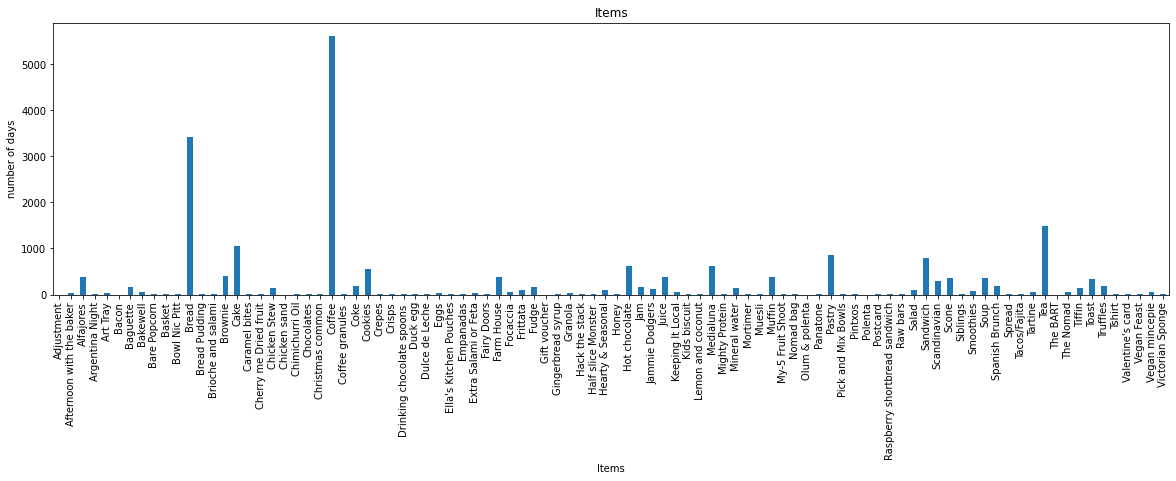

In [7]:
pivot = wbakeries.pivot_table(index = ['Items'], aggfunc = 'size')
pivot.plot.bar(figsize=(20,5), title='Items')
plt.ylabel("number of days")
plt.show()

In [8]:
#すべてのアイテム情報を入手
items = list(wbakeries.pivot_table(index = ['Items'], aggfunc = 'size').index)
#items

In [9]:
#TransactionNo毎に買った商品の配列　TransactionNo×items
item_days = [[0 for i in range(len(items))] for j in range(max(wbakeries['TransactionNo']))]

In [10]:
for i in range(len(wbakeries)):
    item_days[wbakeries.iloc[i,0]-1][items.index(wbakeries.iloc[i,1])] += 1

In [11]:
#heatmapにして表示 -> メモリ不足
#draw_heatmap(item_days, items, [j for j in range(max(wbakeries['TransactionNo']))])

In [12]:
#pndasに変更
pd_item_days = pd.DataFrame(item_days, index=[j for j in range(max(wbakeries['TransactionNo']))], columns=items)
pd_item_days
pd_item_days.to_csv('02_output/item_days.csv')

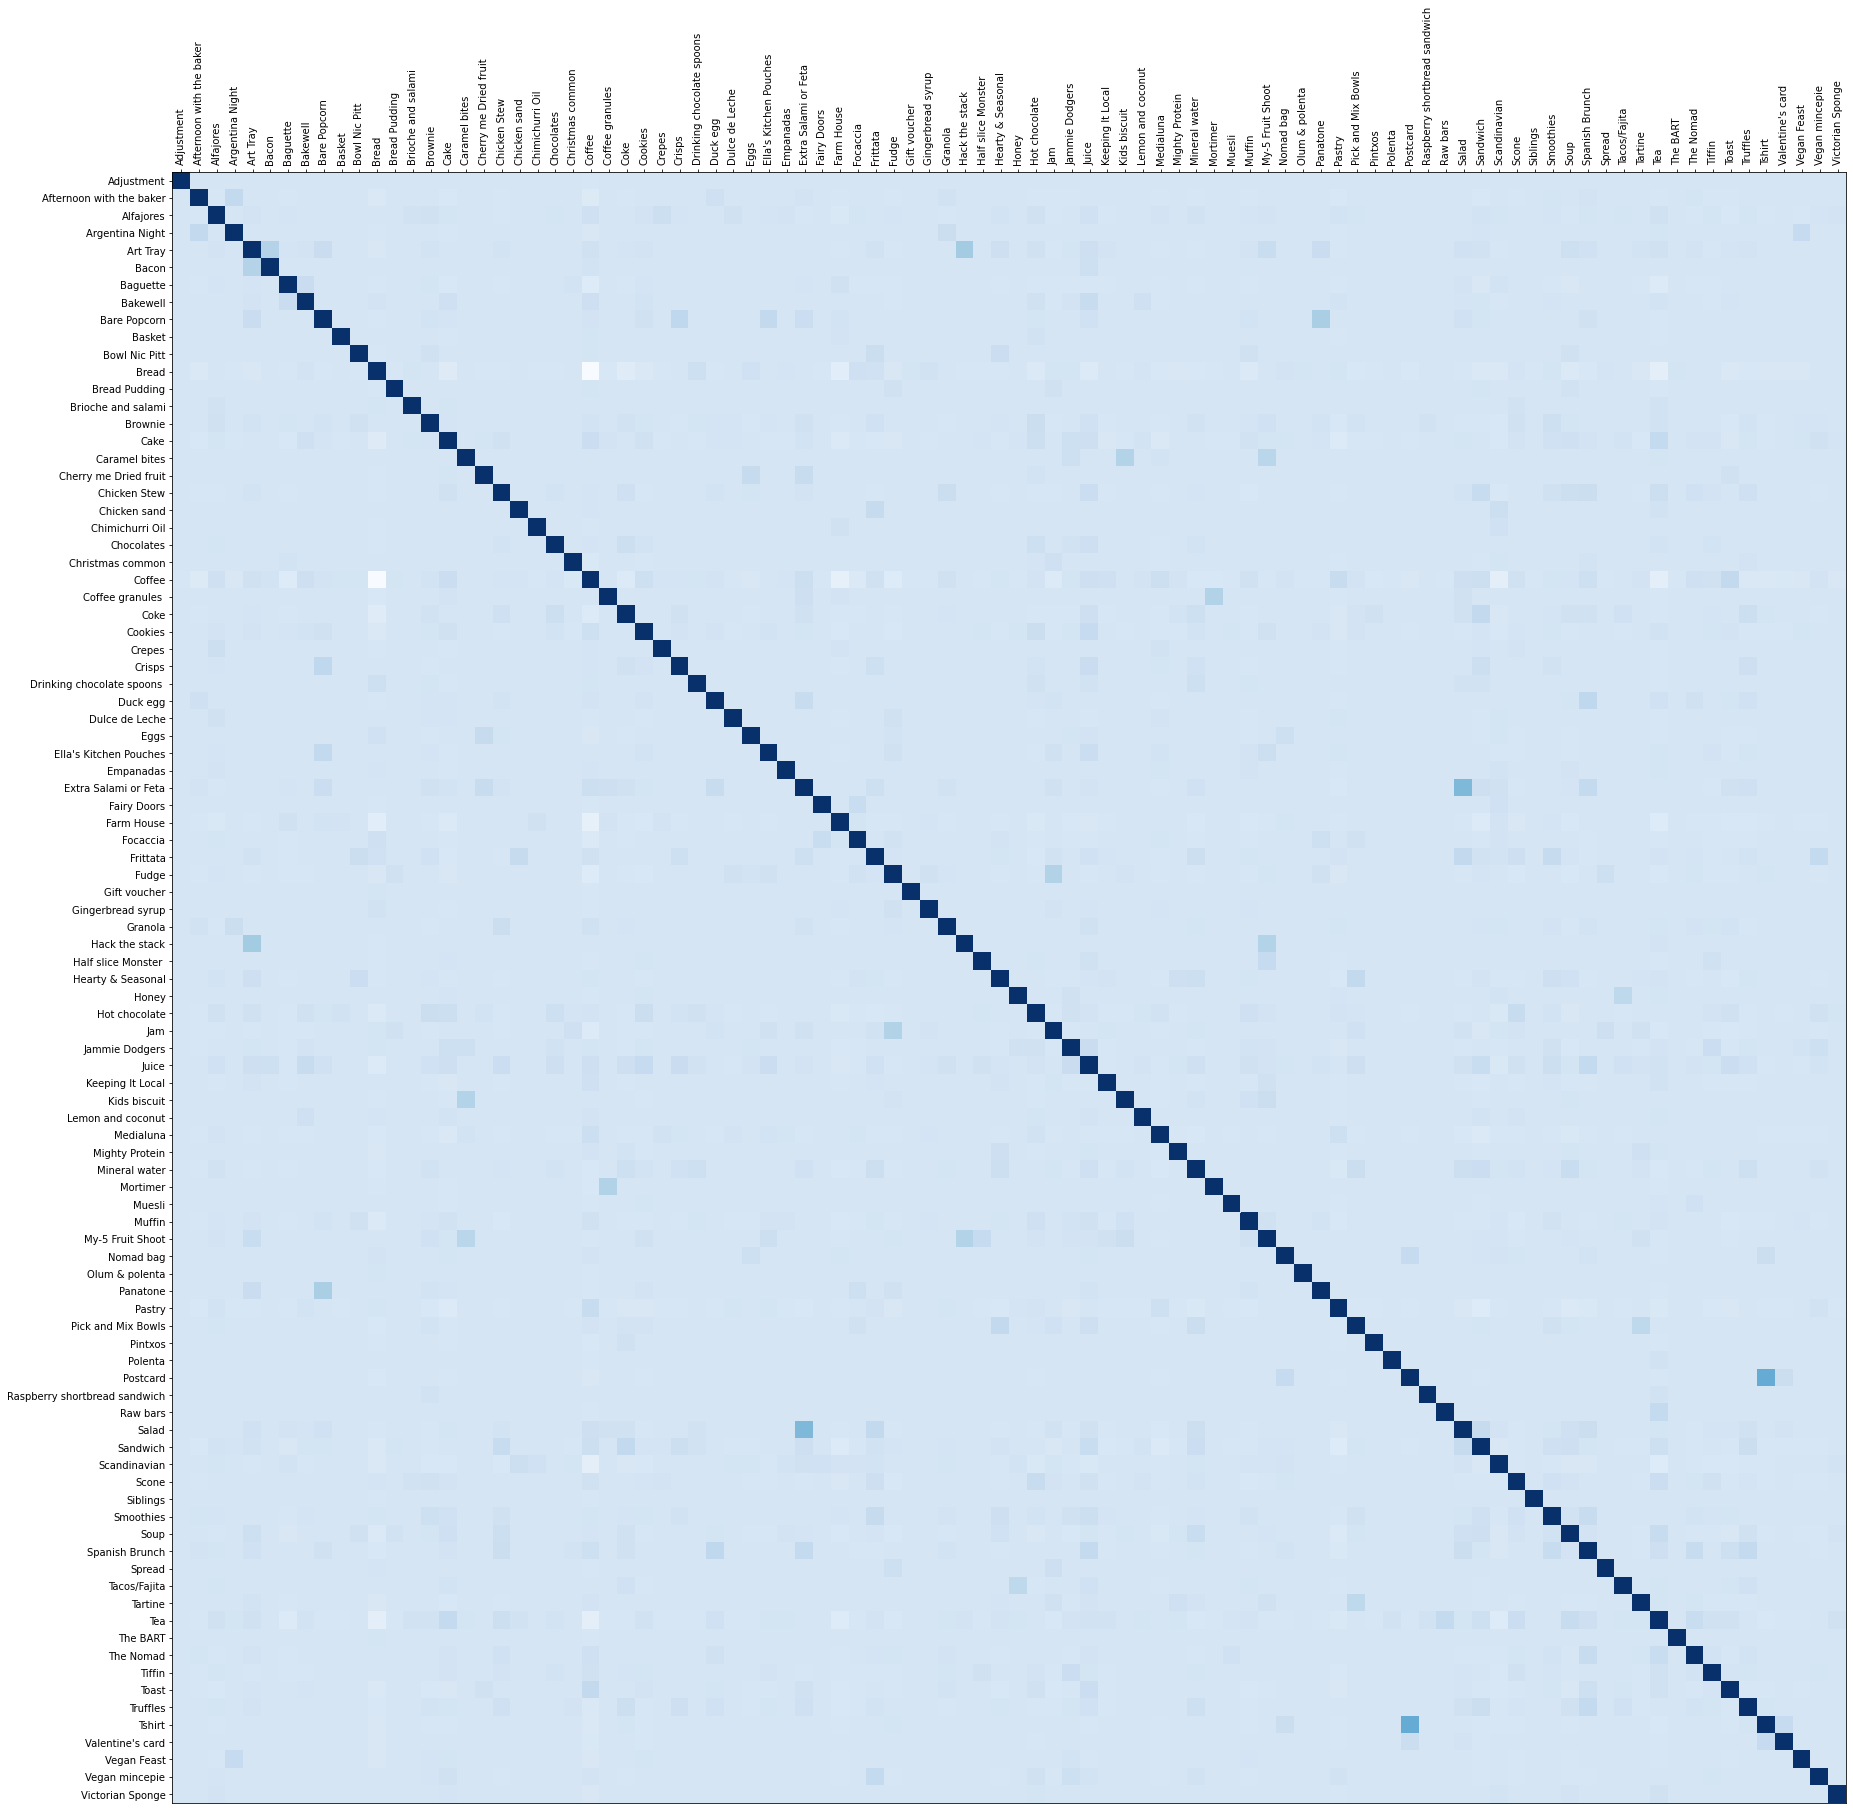

In [13]:
#一緒に買われている商品
pd_item_corr = pd_item_days.corr()
draw_heatmap(pd_item_corr.values, items, items)
pd_item_corr
pd_item_corr.to_csv('02_output/item_corr.csv')

In [14]:
#似ている取引（TransactionNoの相関）
#pd_days_corr = pd_item_days.T.corr()
#draw_heatmap(pd_days_corr.values, items, items)
#pd_days_corr
#pd_days_corr.to_csv('02_output/days_corr.csv')

### (2) Daypartでの分類(時間帯によって売れているもの) 
Daypart,Count Morning,8687 Afternoon,11871 Evening,522 Night,14

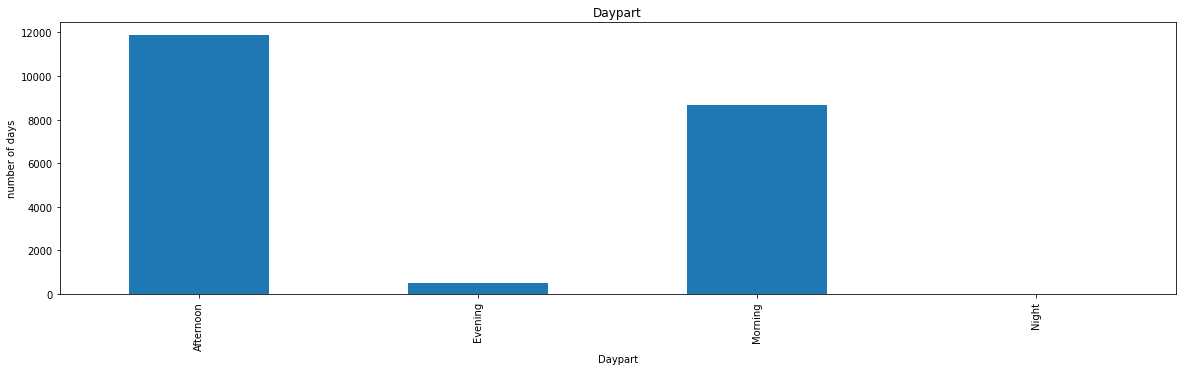

In [15]:
pivot = wbakeries.pivot_table(index = ['Daypart'], aggfunc = 'size')
pivot.plot.bar(figsize=(20,5), title='Daypart')
plt.ylabel("number of days")
plt.show()

In [16]:
#すべてのDaypart情報を入手
dayparts = list(wbakeries.pivot_table(index = ['Daypart'], aggfunc = 'size').index)
dayparts

['Afternoon', 'Evening', 'Morning', 'Night']

In [17]:
#dayparts毎に買った商品の配列　dayparts×items
item_dayparts = [[0 for i in range(len(items))] for j in range(len(dayparts))]

In [18]:
for i in range(len(wbakeries)):
    item_dayparts[dayparts.index(wbakeries.iloc[i,3])][items.index(wbakeries.iloc[i,1])] += 1

In [19]:
pd_item_dayparts = pd.DataFrame(item_dayparts, index= dayparts, columns= items)
pd_item_dayparts
pd_item_dayparts.to_csv('02_output/item_dayparts.csv')

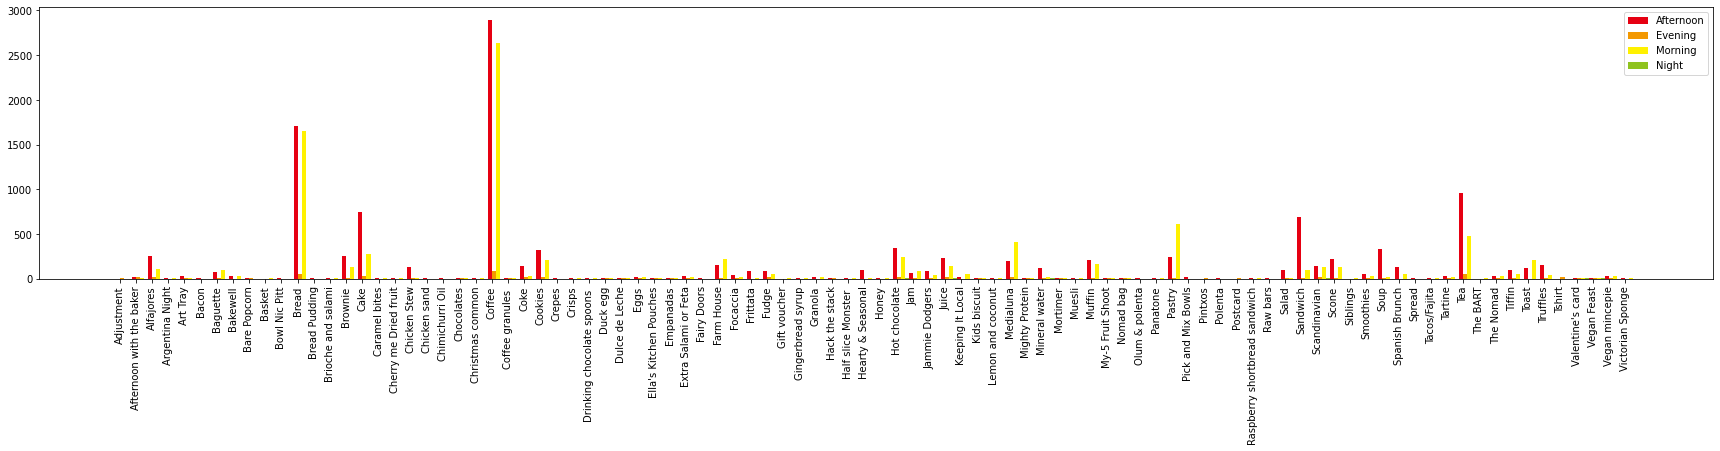

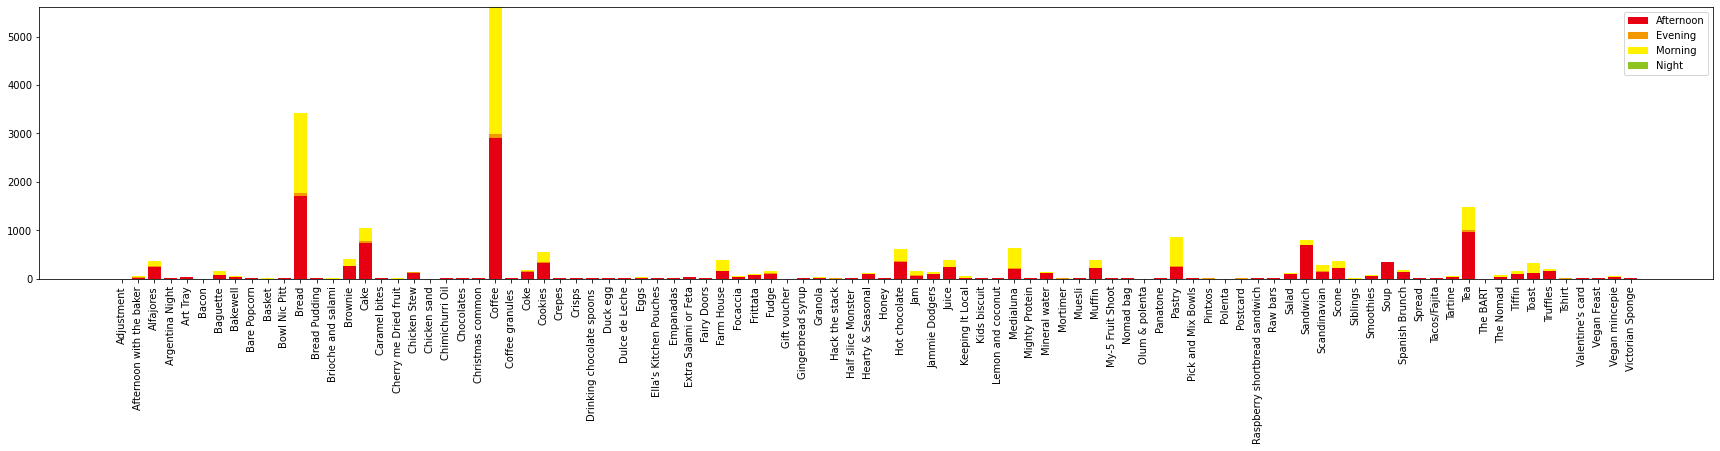

In [20]:
draw_bar(item_dayparts, items, dayparts)
draw_stackedbar(item_dayparts, items, dayparts)

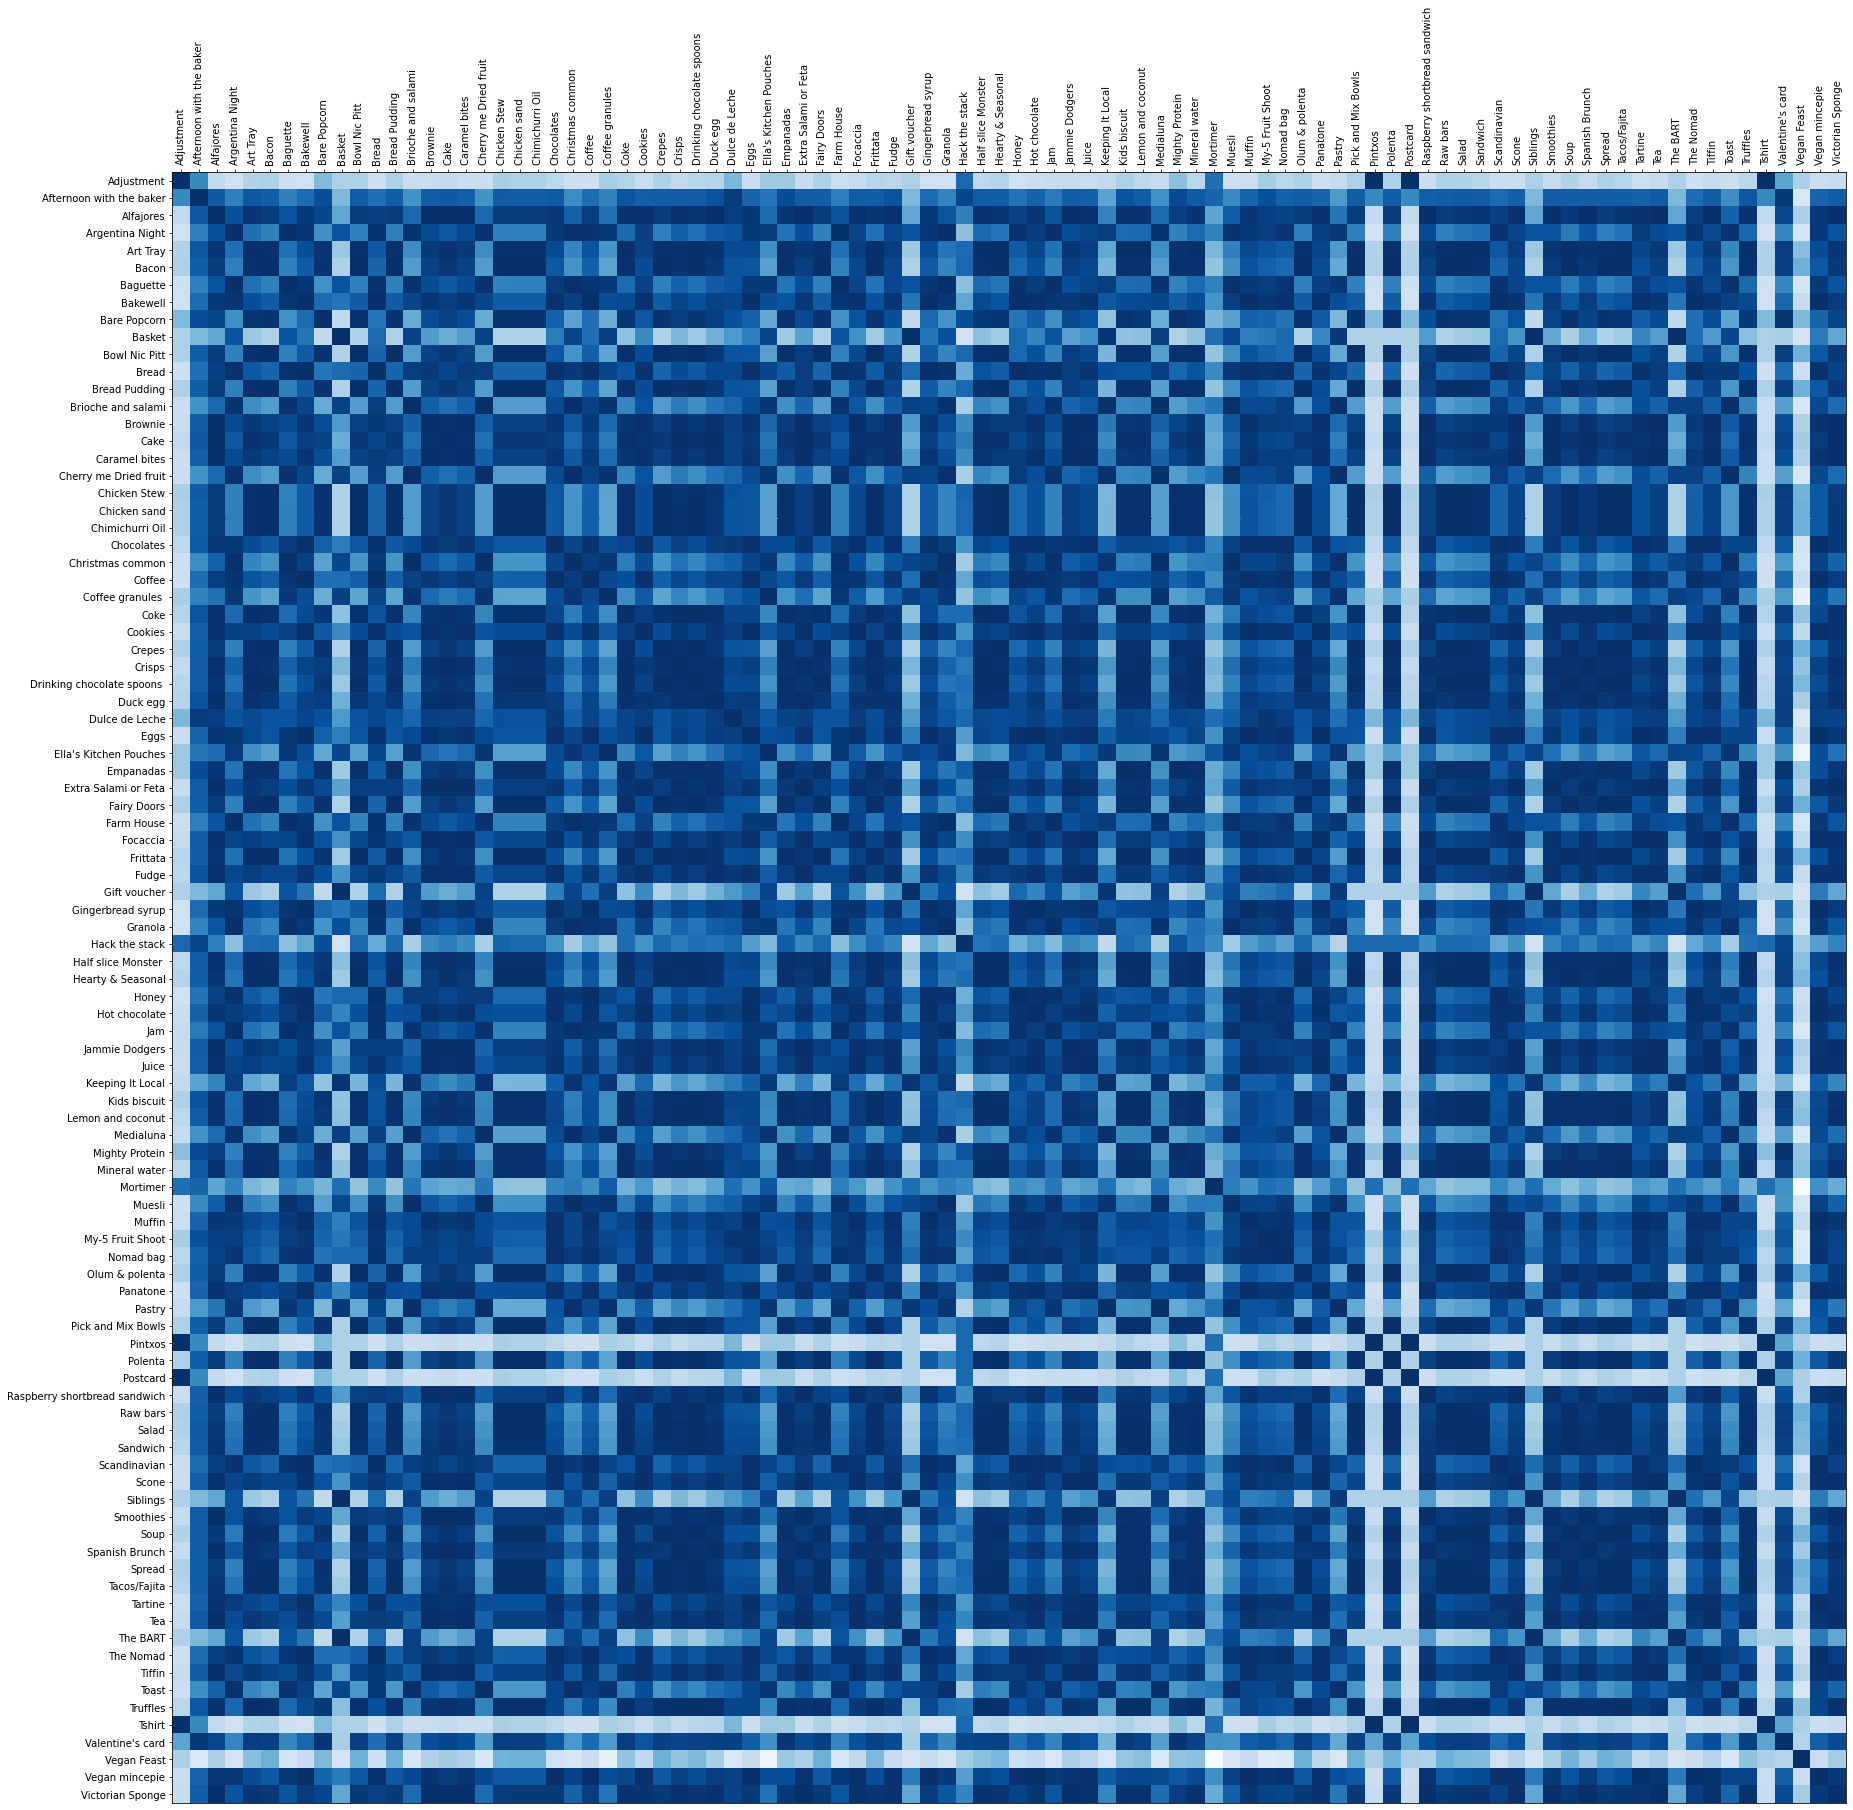

In [21]:
#一緒に買われている商品ー相関
pd_item_corr = pd_item_dayparts.corr()
draw_heatmap(pd_item_corr.values, items, items)
pd_item_corr
pd_item_corr.to_csv('02_output/item_dayparts_corr.csv')

### (3) DayType : 平日か週末かで売れているもの
DayType,Count Weekend,8228 Weekday,12866

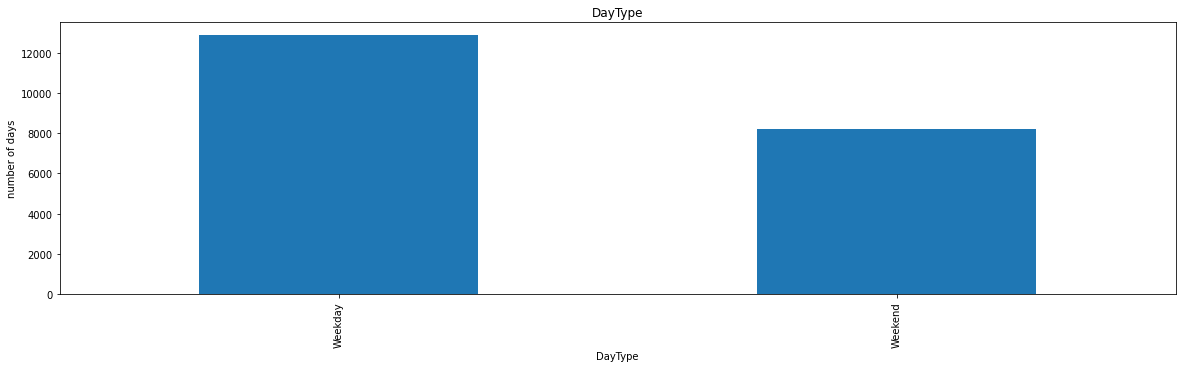

In [22]:
pivot = wbakeries.pivot_table(index = ['DayType'], aggfunc = 'size')
pivot.plot.bar(figsize=(20,5), title='DayType')
plt.ylabel("number of days")
plt.show()

In [23]:
#すべてのDayType情報を入手
daytypes = list(wbakeries.pivot_table(index = ['DayType'], aggfunc = 'size').index)
daytypes

['Weekday', 'Weekend']

In [24]:
#daytypes毎に買った商品の配列　daytypes×items
item_daytypes = [[0 for i in range(len(items))] for j in range(len(daytypes))]

In [25]:
for i in range(len(wbakeries)):
    item_daytypes[daytypes.index(wbakeries.iloc[i,4])][items.index(wbakeries.iloc[i,1])] += 1

In [26]:
pd_item_daytypes = pd.DataFrame(item_daytypes, index= daytypes, columns= items)
pd_item_daytypes
pd_item_daytypes.to_csv('02_output/item_dayparts.csv')

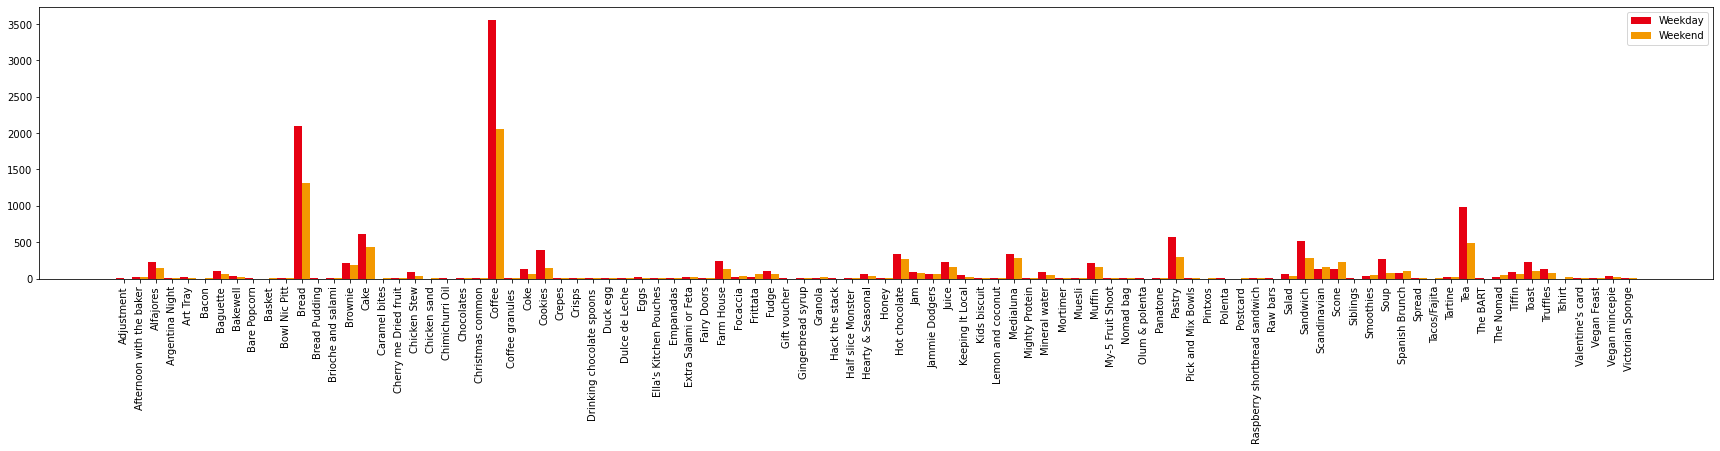

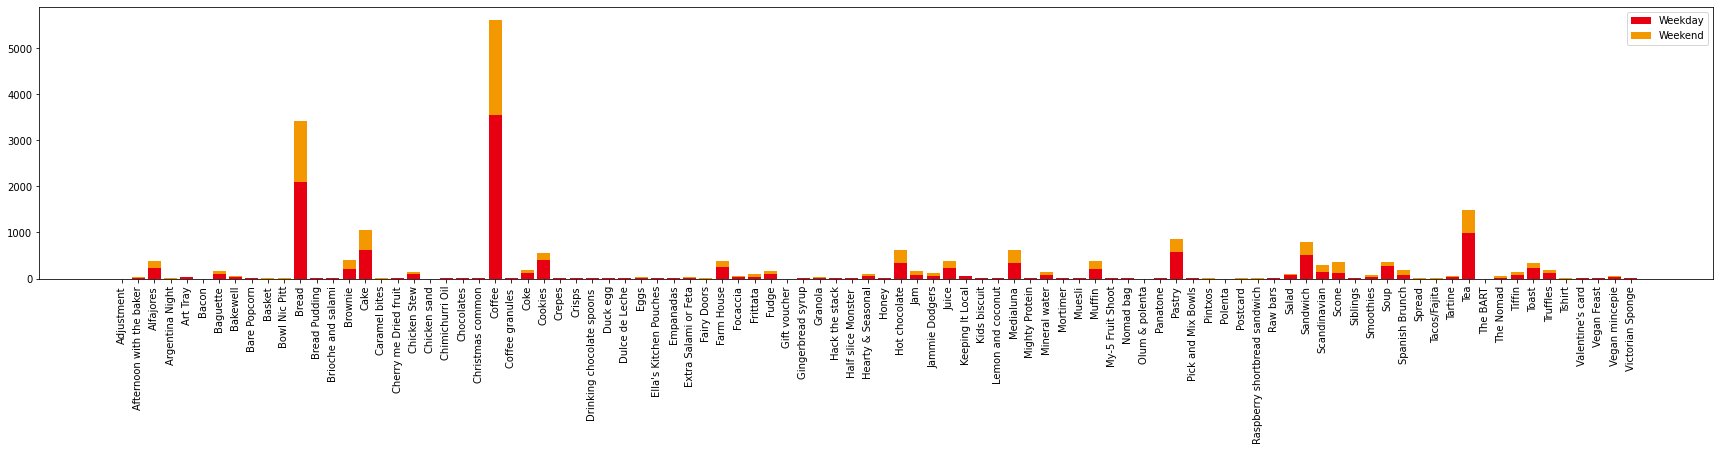

In [27]:
draw_bar(item_daytypes, items, daytypes)
draw_stackedbar(item_daytypes, items, daytypes)

### (4) weather_main : 天気との相関がある商品
そもそも全体の売上にも影響があるか？ weather_main,Count Clouds,9346 Clear,1944 ,3714 Rain,4462 Fog,478 Mist,575 Haze,154 Drizzle,386 Snow,35

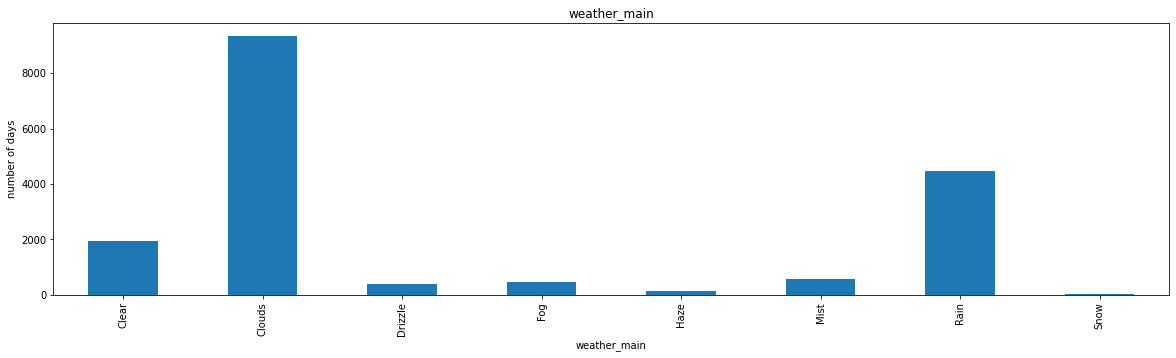

In [28]:
pivot = wbakeries.pivot_table(index = ['weather_main'], aggfunc = 'size')
pivot.plot.bar(figsize=(20,5), title='weather_main')
plt.ylabel("number of days")
plt.show()

In [29]:
#すべてのweather_main情報を入手
weathermains = list(wbakeries.pivot_table(index = ['weather_main'], aggfunc = 'size').index)
weathermains = weathermains + ['NaN']
weathermains

['Clear', 'Clouds', 'Drizzle', 'Fog', 'Haze', 'Mist', 'Rain', 'Snow', 'NaN']

In [30]:
#weather_mains毎に買った商品の配列　daytypes×items
item_weathermains = [[0 for i in range(len(items))] for j in range(len(weathermains))]

In [31]:
for i in range(len(wbakeries)):
    try:
        item_weathermains[weathermains.index(wbakeries.iloc[i,31])][items.index(wbakeries.iloc[i,1])] += 1
    except:
        item_weathermains[8][items.index(wbakeries.iloc[i,1])] += 1#8番目にnanを入れている

In [32]:
pd_item_weathermains = pd.DataFrame(item_weathermains, index= weathermains, columns= items)
pd_item_weathermains
pd_item_weathermains.to_csv('02_output/item_weathermains.csv')

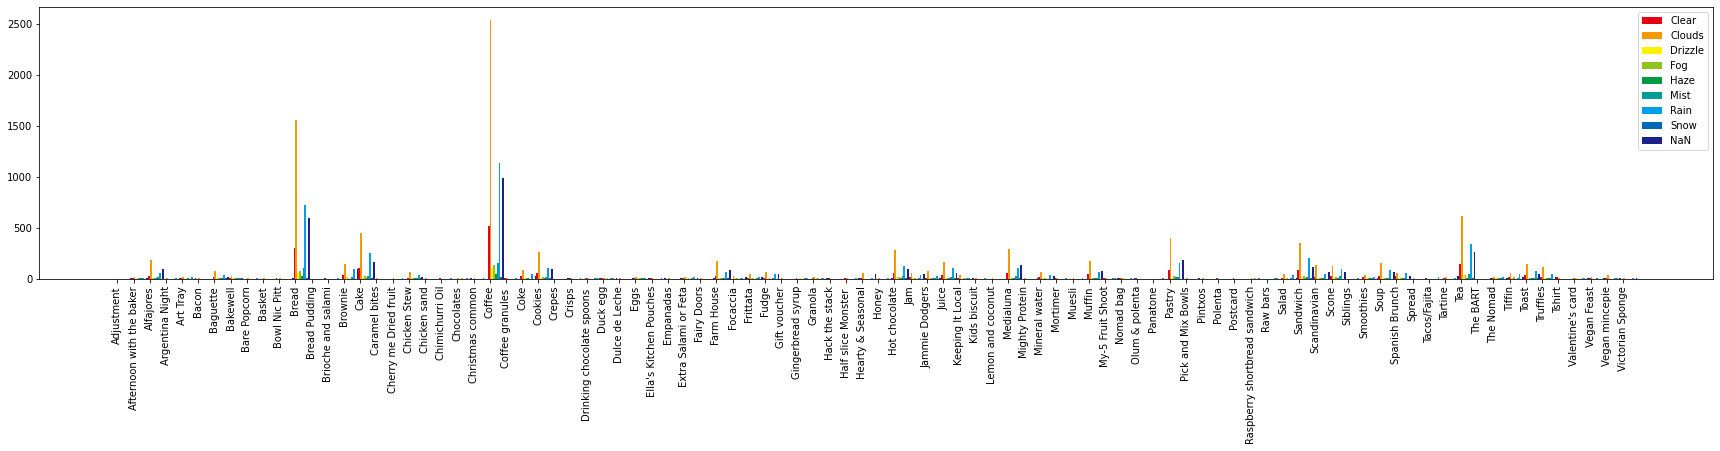

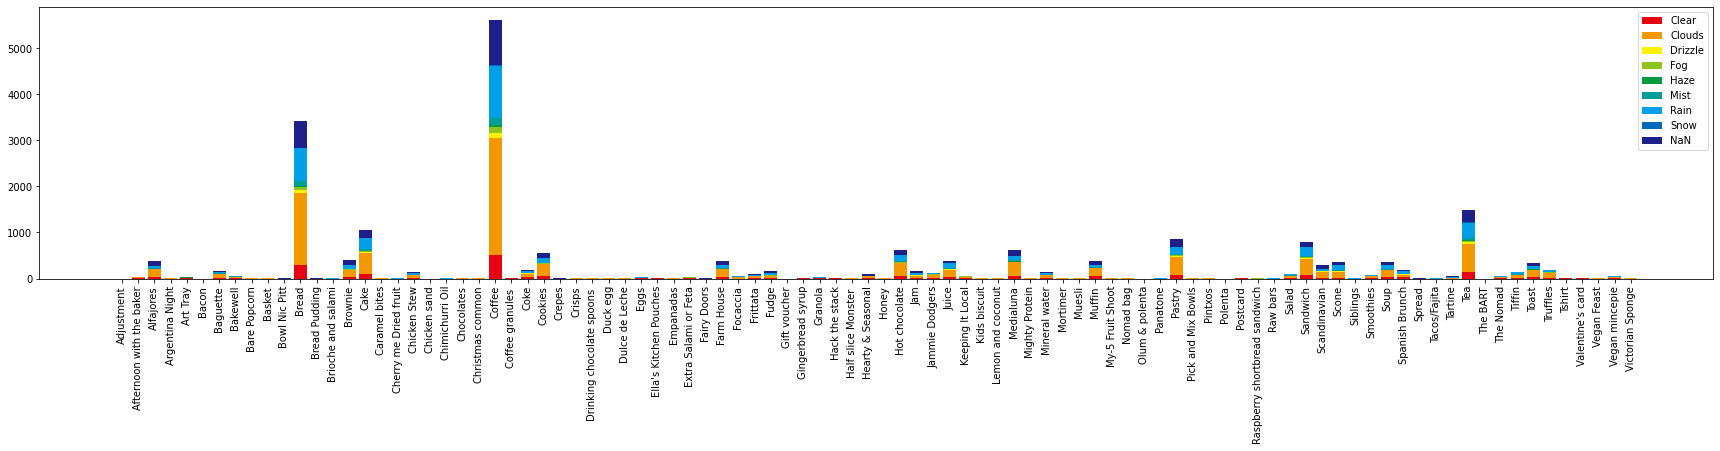

In [33]:
draw_bar(item_weathermains, items, weathermains)
draw_stackedbar(item_weathermains, items, weathermains)

### (5) 主力(人気)商品の抽出
グラフ&出力csvにて確認